# **An exploratory data analysis of climate change and natural disasters**
The objective is to explore and analyse climate change and its relation to natural disasters (occurrence and economic impact). For this analysis, global temperature rise is used as an indicator of climate change.

### Datasets used in this research
*   Number of  natural disasters:
> https://github.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/blob/master/datasets/number-of-natural-disaster-events.csv


*   Economic damage from natural disasters:
> https://github.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/blob/master/datasets/economic-damage-from-natural-disasters.csv

# Part 1: SQL Database Setup and Queries.

---






## 1.1 Database: SQL Query I

### 1. Import the downloaded dataset into a SQL database.

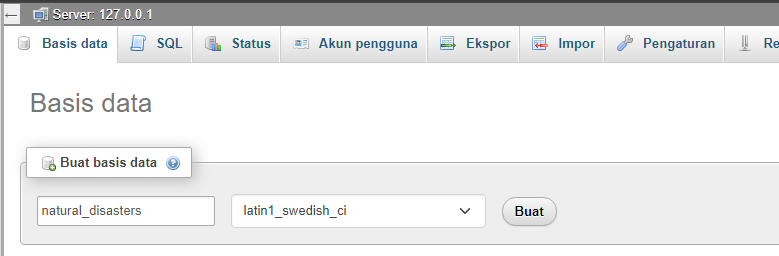

Untuk melakukan import dataset ke dalam database, langkah pertama yang perlu dilakukan adalah membuat databasenya. Dalam contoh ini, saya menggunakan phpMyAdmin.


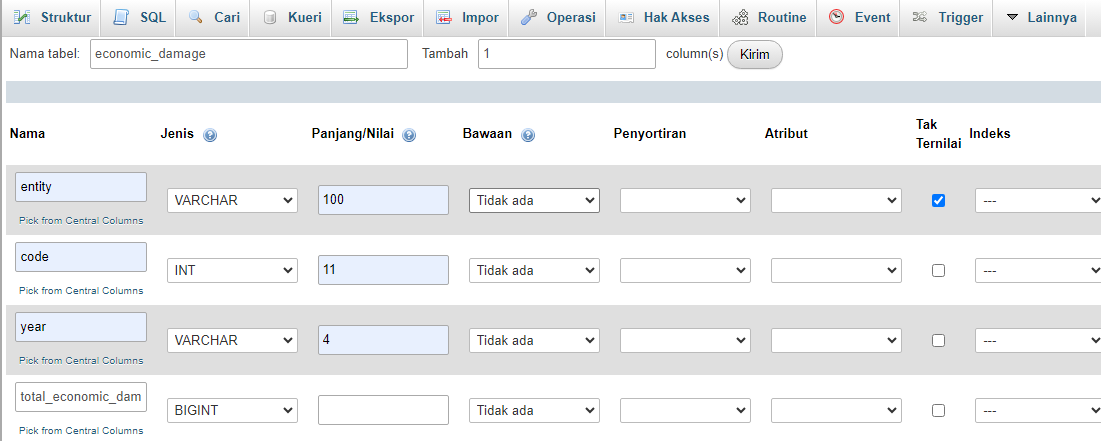

Setelah itu, buatlah tabel untuk menampung dataset yang akan diimport. Pastikan bahwa nama kolom dan tipe datanya disesuaikan dengan dataset yang akan diimport. Ini penting untuk memastikan konsistensi dan integritas data dalam tabel yang dibuat.

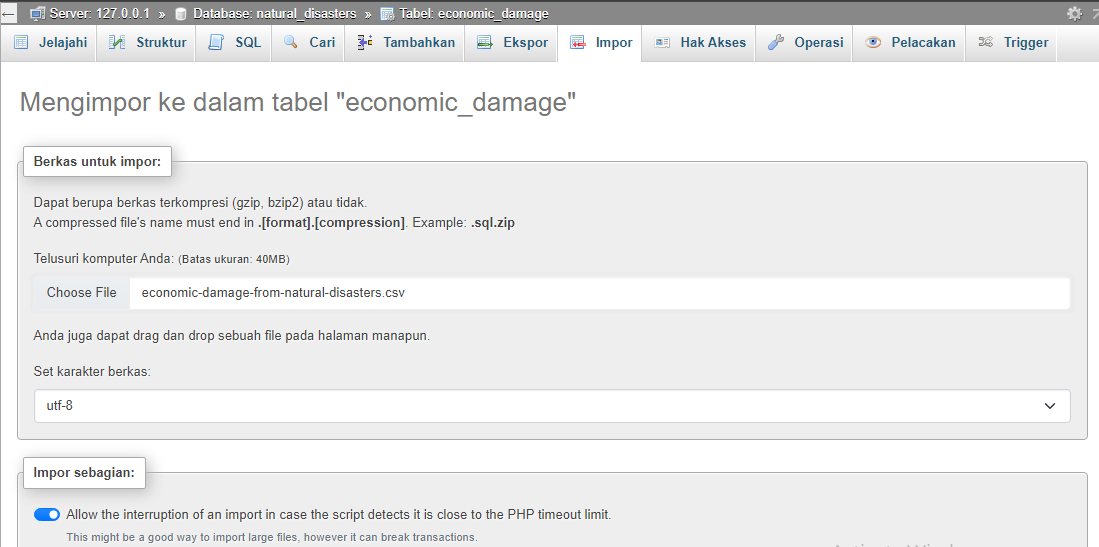

Selanjutnya, import dataset yang akan digunakan ke dalam table yang telah dibuat sebelumnya. Jika proses importnya berhasil, sistem akan mengirimkan pesan 'import telah selesai'.

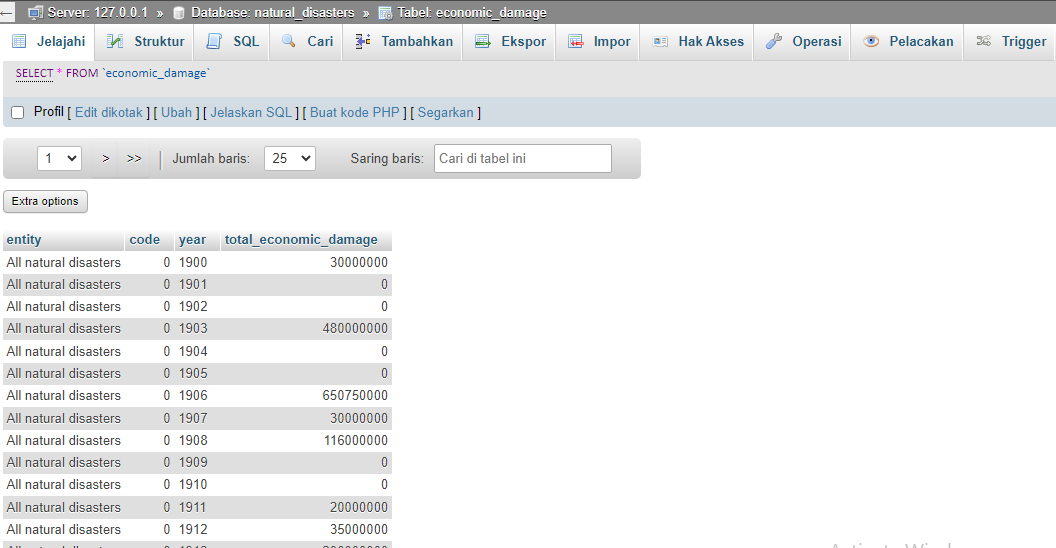

Hasil akhir jika proses import dataset berhasil dilakukan.

Note: Lakukan hal yang sama dari awal hingga akhir jika ingin membuat table lainnya dengan dataset yang berbeda.

### 2. Write an SQL query to fetch `Year` and any relevant variables (e.g., `Number of natural disasters`, `Economic damage`).

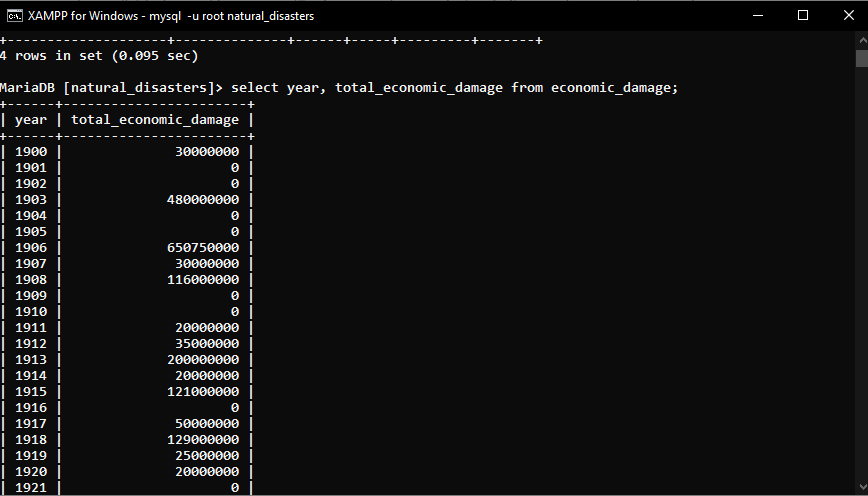

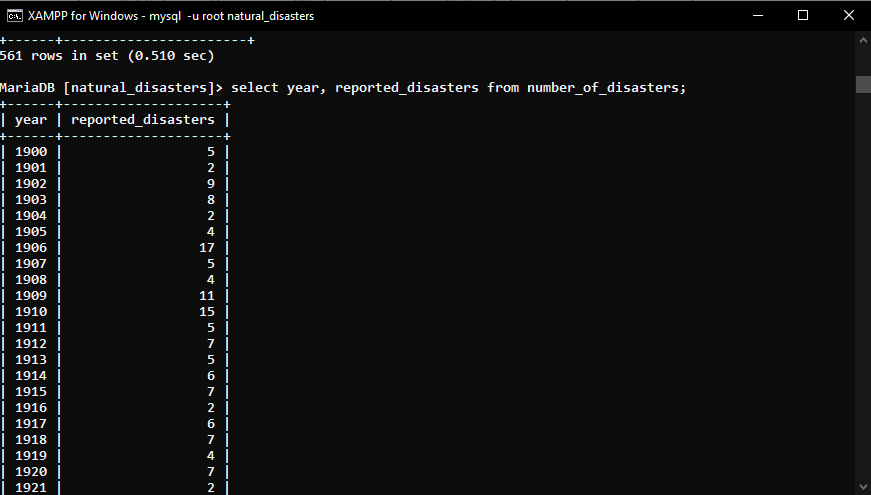

## 1.2 Database: SQL Query II

### 1. Write SQL query to show Total Natural Disaster and Economic Damage for every type of Disaster (Entity)

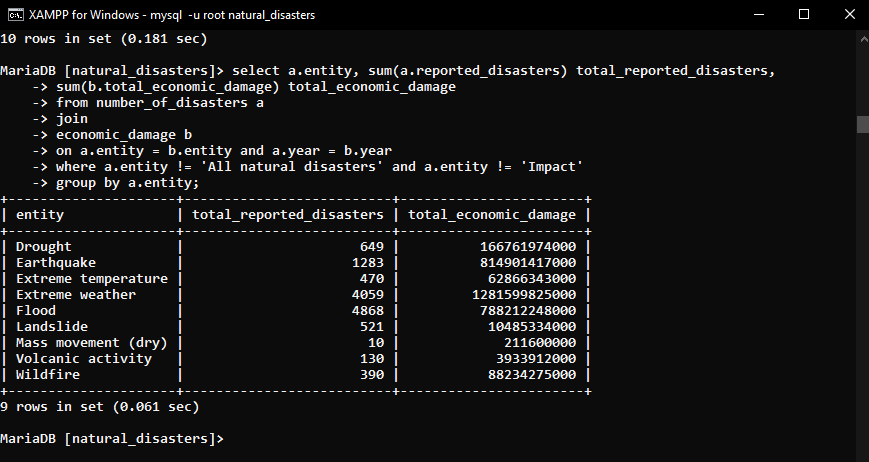

Berdasarkan data tersebut, kita bisa menyimpulkan bahwa longsor adalah bencana alam yang paling sering terjadi, tetapi kerugian ekonomi yang disebabkan oleh cuaca ekstrim lebih besar daripada bencana alam lainnya.

### 2. Write an SQL query to summarize the data per 10 year, calculating averages and sums for Natural disaster & Economic damage.

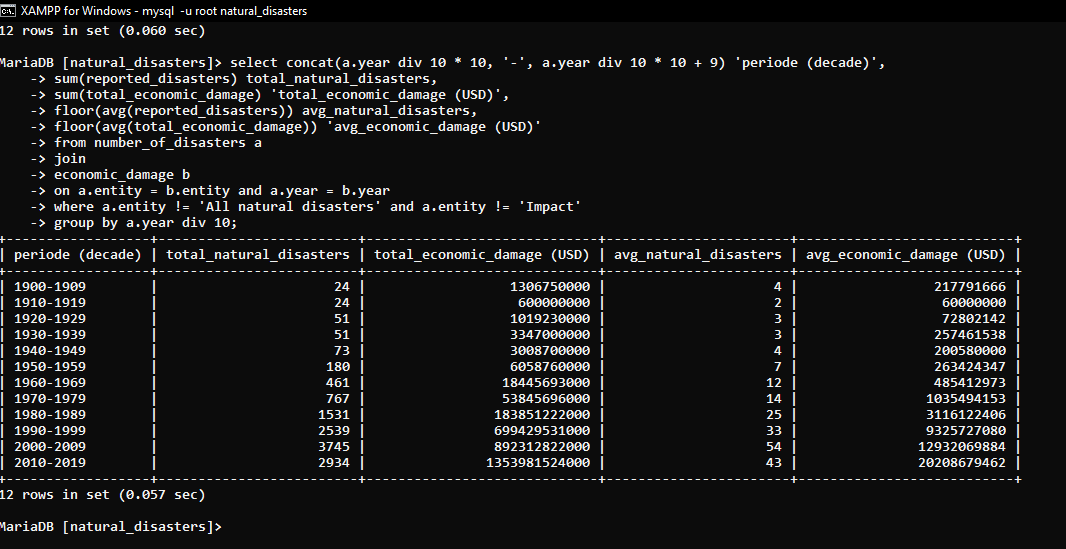

Dari tahun ke tahun, jumlah bencana alam mengalami peningkatan yang signifikan. Namun, pada periode 2010-2019, tercatat jumlah bencana alam yang terjadi lebih sedikit dibandingkan periode sebelumnya. Meskipun demikian, kerugian ekonomi selama periode 2010-2019 jauh lebih besar dibandingkan dengan periode-periode sebelumnya.

# Part 2: Data Science and Statistical Analysis.

---

## Data Preparation

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
df_natural_disas = pd.read_csv('https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/number-of-natural-disaster-events.csv')

## Data Understanding

In [29]:
df_natural_disas.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


Karena DataFrame yang diberikan memiliki satu nama variable yang terlalu panjang, maka sebaiknya menggantinya dengan nama yang lebih singkat agar proses selanjutnya lebih terstruktur.

In [30]:
df_natural_disas.columns = ['entity', 'code', 'year', 'reported_disasters']
df_natural_disas.head()

,entity,code,year,reported_disasters
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [31]:
df_natural_disas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   entity              828 non-null    object 
 1   code                0 non-null      float64
 2   year                828 non-null    int64  
 3   reported_disasters  828 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 26.0+ KB


Dataset tersebut "Number of Natural Disasters" terdiri dari empat variabel dengan berbagai jenis tipe data, yaitu satu variabel berjenis float, dua variabel berjenis integer, dan satu variabel berjenis object. Setiap variabel dalam dataset ini memiliki 828 baris data.

In [32]:
df_natural_disas.isnull().sum()

entity                  0
code                  828
year                    0
reported_disasters      0
dtype: int64

Terdapat 828 missing values pada variable 'code', yang berarti variable 'code' tidak memiliki baris data sama sekali.

In [33]:
df_natural_disas.nunique()

entity                 11
code                    0
year                  119
reported_disasters    144
dtype: int64

Dari sini, kita dapat mengidentifikasi jumlah nilai unik pada setiap variabel.

In [34]:
df_natural_disas['entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

Kemudian, kita dapat mengidentifikasi informasi yang terdapat dalam variabel "entity." Alasan kenapa hanya memeriksa data variabel "entity" adalah karena variabel ini berisi data yang bersifat kategorikal.

## Data Cleansing

In [35]:
df_natural_disas.drop('code', inplace=True, axis=1)
df_natural_disas.head()

,entity,year,reported_disasters
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2


Variable code dihapus karena tidak memiliki data sama sekali, sehingga tidak dapat digunakan dalam analisis ini.

In [36]:
df_natural_disas[df_natural_disas['entity'] == 'Impact']['reported_disasters'].unique()

array([1])

In [37]:
df_natural_disas = df_natural_disas[df_natural_disas['entity'] != 'Impact']
df_natural_disas['entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Landslide',
       'Mass movement (dry)', 'Volcanic activity', 'Wildfire'],
      dtype=object)

Data impact dihapus karena data tersebut tidak relevan dengan analisis yang akan dilakukan. Nilai data tersebut hanya bernilai 1, dan jika nilai 1 tersebut mewakili tipe data boolean maka itu berarti 'True'. Tapi hal itu sudah pasti bahwa setiap bencana memiliki dampak.

In [38]:
df_natural_disas.drop_duplicates(inplace=True)

Jika terdapat duplikat data, maka baris data tersebut akan dihapus.

## Exploratory Data Analysis

In [39]:
df_natural_disas[df_natural_disas['entity'] != 'All natural disasters'].describe()

,year,reported_disasters
count,708.000000,708.000000
mean,1971.210452,18.659605
std,31.872439,32.969382
min,1900.000000,1.000000
25%,1949.000000,2.000000
50%,1977.000000,6.000000
75%,1997.250000,19.000000
max,2018.000000,226.000000


In [42]:
dfpivot = df_natural_disas.pivot(index='year', columns='entity', values='reported_disasters')
dfpivot.head()

entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Landslide,Mass movement (dry),Volcanic activity,Wildfire
year,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


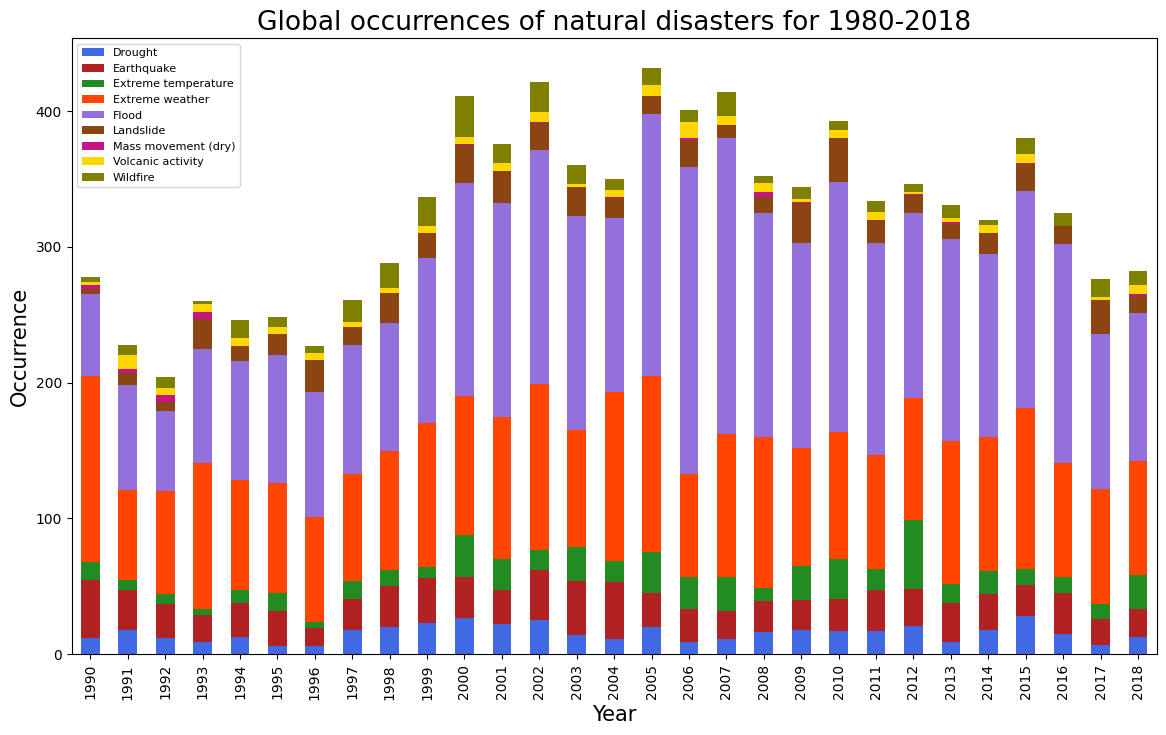

In [58]:
colors = ['#4169e1', '#b22222', '#228b22', '#ff4500', '#9370db', '#8b4513', '#c71585', '#ffd700', 'olive']

dfpivot.drop(['All natural disasters'], axis = 1).loc[1990:].plot.bar(width = 0.5, stacked = True, color = colors, figsize = (14, 8))

plt.title('Global occurrences of natural disasters for 1980-2018', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Occurrence', fontsize = 15)
plt.legend(loc='upper left', prop = {'size': 8})
plt.show()